### Example code for Figure 2
https://www.nature.com/articles/s43247-022-00385-x/figures/2

In [1]:
import numpy as np
import pandas as pd
import sys, os, scipy, pickle
from osgeo import gdal

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers import *
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

%matplotlib inline

In [2]:
with open('../github/ross_fig2.p', 'rb') as f:
     R4x,R4y,R4n,R4A,R4mask,R4r,R1x,R1y,R1n,R1A,R1mask,R1r,R3x,R3y,R3n,R3A,R3mask,R3r,R2x,R2y,R2n,R2A,R2mask,R2r = pickle.load(f)

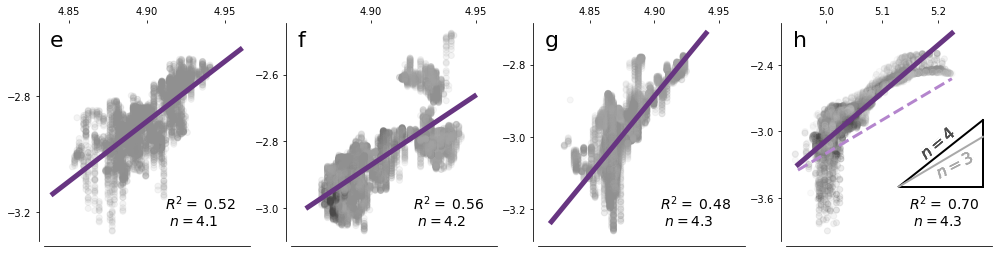

In [3]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(17,4))
sns.despine(left=False, bottom=False, right=True,offset=5)
cmapp = mpl.colors.LinearSegmentedColormap.from_list("", ["#D4D4D4","#B4B4B4","#909090","#909090","#494848"])

ax1.scatter(R4x[::6],R4y[::6],c=R4mask[::6],cmap=cmapp,alpha=.1,vmin=1.0,vmax=1.42)
ax2.scatter(R3x[::3],R3y[::3],c=R3mask[::3],cmap=cmapp,alpha=.1,vmin=1.0,vmax=1.42)
ax3.scatter(R2x[::2],R2y[::2],c=R2mask[::2],cmap=cmapp,alpha=.1,vmin=1.0,vmax=1.42)
ax4.scatter(R1x[::15],R1y[::15],c=R1mask[::15],cmap=cmapp,alpha=.1,vmin=1.0,vmax=1.42)

an1 = AnchoredText("$R^2=$ {:.2f} \n $n = {}$".format(R1r,np.around(R1n.item(),1)), prop={'size':14},loc="lower right", frameon=False);ax4.add_artist(an1)
an2 = AnchoredText("$R^2=$ {:.2f} \n $n = {}$".format(R2r,np.around(R2n.item(),1)), prop={'size':14},loc="lower right", frameon=False);ax3.add_artist(an2)
an3 = AnchoredText("$R^2=$ {:.2f} \n $n = {}$".format(R3r,np.around(R3n.item(),1)), prop={'size':14},loc="lower right", frameon=False);ax2.add_artist(an3)
an4 = AnchoredText("$R^2=$ {:.2f} \n $n = {}$".format(R4r,np.around(R4n.item(),1)), prop={'size':14},loc="lower right", frameon=False);ax1.add_artist(an4)

a1 = AnchoredText("h", prop={'size':22},loc="upper left",pad=-.2, frameon=False);ax4.add_artist(a1)
a2 = AnchoredText("g", prop={'size':22},loc="upper left",pad=-.2, frameon=False);ax3.add_artist(a2)
a3 = AnchoredText("f", prop={'size':22},loc="upper left",pad=-.2, frameon=False);ax2.add_artist(a3)
a4 = AnchoredText("e", prop={'size':22},loc="upper left",pad=-.2, frameon=False);ax1.add_artist(a4)

new_x1= np.arange(4.95, 5.225,0.0012);ax4.plot(new_x1, R1A+R1n*new_x1, color="#673581", lw = 5)
new_x2 = np.arange(4.82, 4.94,0.0012);ax3.plot(new_x2, R2A+R2n*new_x2, color="#673581", lw = 5)
new_x3 = np.arange(4.87, 4.95,0.0012);ax2.plot(new_x3, R3A+R3n*new_x3, color="#673581", lw = 5)
new_x4 = np.arange(4.84,4.96,0.0012);ax1.plot(new_x4, R4A+R4n*new_x4, color="#673581", lw = 5)


new_x1 = np.arange(4.95, 5.225,0.0012);ax4.plot(new_x1, -18.2+3*new_x1, color="#b485cd", lw = 3, linestyle='dashed')
#new_x2 = np.arange(4.82, 4.94,0.0012);ax3.plot(new_x2, -17.71+3*new_x2, color="#b485cd", lw =3, linestyle='dashed')
#new_x3 = np.arange(4.87, 4.95,0.0012);ax2.plot(new_x3, -17.62+3*new_x3, color="#b485cd", lw = 3, linestyle='dashed')
#new_x4 = np.arange(4.84,4.96,0.0012);ax1.plot(new_x4, -17.675+3*new_x4, color="#b485cd", lw = 3, linestyle='dashed')

ax1.xaxis.tick_top();ax2.xaxis.tick_top();ax3.xaxis.tick_top();ax4.xaxis.tick_top()

plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

for i in range(4):
    plt.gcf().get_axes()[1].set_xlim(4.862,4.96);plt.gcf().get_axes()[0].set_ylim(-3.3,-2.55);plt.gcf().get_axes()[2].set_xlim(4.81,4.97);
    
    loc = mpl.ticker.MultipleLocator(base=.2);loc2 = mpl.ticker.MultipleLocator(base=.6);
    loc3 = mpl.ticker.MultipleLocator(base=.4);
    plt.gcf().get_axes()[0].yaxis.set_major_locator(loc3);plt.gcf().get_axes()[1].yaxis.set_major_locator(loc);
    plt.gcf().get_axes()[2].yaxis.set_major_locator(loc);plt.gcf().get_axes()[3].yaxis.set_major_locator(loc2);
    plt.gcf().get_axes()[3].xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=.1));
    plt.gcf().get_axes()[2].xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=.05));
    plt.gcf().get_axes()[1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=.05));
    plt.gcf().get_axes()[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=.05));
    plt.gcf().get_axes()[3].text(5.2, -3.1, "$n=4$", size=16, va="center", ha="center", rotation=40.,color='#4d4d4d')
    plt.gcf().get_axes()[3].text(5.23, -3.3, "$n=3$", size=16, va="center", ha="center", rotation=27.,color='#A9A9A9')
    
ax4.plot([5.28, 5.28], [-3.5,-2.9], 'k', lw=2)
ax4.plot([5.28, 5.13], [-3.5, -3.5], 'k', lw=2)
ax4.plot([5.13, 5.28], [-3.5, -2.9], 'k', lw=2)
ax4.plot([5.13, 5.28], [-3.5, -3.05], '#A9A9A9', lw=2)
    
#fnamel='../figures/ross_fig2.png'
#plt.savefig(fnamel, dpi=270, transparent=True, pad_inches=0.1)
plt.show()